In [171]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 1. Загружаем данные

In [172]:
url = "https://raw.githubusercontent.com/KateNovikova1806/MachineLearning/main/MoviesOnStreamingPlatforms_updated.csv"
data_raw = pd.read_csv(url)


## Описание задачи

   Датасет содержит данные более, чем о 16 тясячах фильмов. Для каждого фильма указана платформа, где его можно посмотреть, а также средний рейтинг фильма, целевая возрастная аудитория, год, в котором был снят фильм и оценка популярности.

   Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует названию фильма) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [173]:
data_raw.shape

(16744, 17)

Первые строки таблицы:

In [174]:
data_raw.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0



Столбцы (признаки) имеют имена

1. The year in which the movie was produced - год, в котором вышел фильм.
2. Age - возрастная категория.
3. IMDb rating - рейтинг на IMDb.
4. Rotten Tomatoes - рейтинг на Rotten Tomatoes.
5. Whether the movie is found on Netflix - наличие фильма на Netflix.
6. Whether the movie is found on Hulu - наличие фильма на Hulu.
7. Whether the movie is found on Prime Video - наличие фильма на Prime Video.
8. Directors - режиссеры фильма.
9. Genres - жанр фильма.
10. Country - страна, в которой снят фильм.
11. Language - язык оригинала.
12. Runtime - длительность фильма.



Признаки (5), (6), (7) - бинарные, (2), (4), (8), (9), (10), (11), (12) - номинальные (категориальные), остальные признаки - количественные (числовые).

Имена признаков представлены ниже.

In [175]:
data_raw.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

Имена строк совпадают с порядковым номером фильма (ID)

# 2. Визуализация данных и вычисление основных характеристик

Сводная информация о признаках:

In [176]:
data_raw.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000



Для каждого количественного признака приведены: 
1. средние значения (mean) - среднее арифметическое
2. стандартное отклонение - показатель рассеивания значений случайной величины относительно её математического ожидания.
3. минимальное и макимальное значения
4. медиана - это значение делящее распределение пополам. Другими словами это значение ниже которого находятся половина значений, и выше также половина всех значений в распределении.
5. значения квантилей - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

# 3. Обработка категориальных признаков

Столбцы 'Directors', 'Genres', 'Country', 'Languages', 'Age' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [177]:
data_raw['Directors'].dtype

dtype('O')

In [178]:
data_raw['Directors'] = data_raw['Directors'].astype('category')

In [179]:
data_raw['Directors'].dtype

CategoricalDtype(categories=['A'Ali de Sousa', 'A. Bhimsingh', 'A. Edward Sutherland',
                  'A. Edward Sutherland,John Rawlins', 'A. Fishman',
                  'A. Jagadesh', 'A. Majid', 'A. Salaam', 'A. Todd Smith',
                  'A. Troy Thomas',
                  ...
                  'Álvaro de Armiñán', 'Ángel Izquierdo,Ricardo Ramón',
                  'Árpád Sopsits', 'Çetin Inanç,Robert Aldrich,Bert I. Gordon',
                  'Édouard Molinaro', 'Élie Chouraqui', 'Émile Gaudreault',
                  'Óskar Thór Axelsson', 'Ömer Faruk Sorak', 'Özcan Alper'],
                 ordered=False)

In [180]:
data_raw['Genres'].dtype

dtype('O')

In [181]:
data_raw['Genres'] = data_raw['Genres'].astype('category')

In [182]:
data_raw['Genres'].dtype

CategoricalDtype(categories=['Action', 'Action,Adventure', 'Action,Adventure,Biography',
                  'Action,Adventure,Biography,Drama,History',
                  'Action,Adventure,Biography,Drama,History,Romance,War',
                  'Action,Adventure,Biography,Drama,Romance',
                  'Action,Adventure,Comedy', 'Action,Adventure,Comedy,Crime',
                  'Action,Adventure,Comedy,Crime,Drama,Romance',
                  'Action,Adventure,Comedy,Crime,Drama,Thriller',
                  ...
                  'Thriller,Mystery', 'Thriller,War', 'War', 'War,Documentary',
                  'War,Drama', 'Western', 'Western,Comedy', 'Western,Horror',
                  'Western,Mystery', 'Western,War'],
                 ordered=False)

In [183]:
data_raw['Country'].dtype

dtype('O')

In [184]:
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Country'].dtype

CategoricalDtype(categories=['Afghanistan,France', 'Afghanistan,United States',
                  'Albania,Austria,France', 'Albania,Greece,France',
                  'Albania,United States', 'Algeria,France', 'Argentina',
                  'Argentina,Australia', 'Argentina,Austria,Germany',
                  'Argentina,Brazil',
                  ...
                  'West Germany,Mexico,Peru', 'West Germany,Peru',
                  'West Germany,South Africa,United States',
                  'West Germany,Spain', 'West Germany,Sweden,United States',
                  'West Germany,Switzerland,United States',
                  'West Germany,United States', 'Yugoslavia',
                  'Yugoslavia,United States', 'Zambia,Sweden'],
                 ordered=False)

In [185]:
data_raw['Language'].dtype

dtype('O')

In [186]:
data_raw['Language'] = data_raw['Language'].astype('category')
data_raw['Language'].dtype

CategoricalDtype(categories=['Aboriginal,English', 'Aboriginal,Portuguese', 'Afrikaans',
                  'Afrikaans,English', 'Akan', 'Akan,English', 'Albanian',
                  'American Sign Language,English',
                  'American Sign Language,English,Spanish', 'Arabic',
                  ...
                  'Urdu,Tajik,Russian', 'Vietnamese',
                  'Vietnamese,English,Japanese', 'Wolof,French,English,Arabic',
                  'Xhosa,Southern Sotho,English,Afrikaans',
                  'Yiddish,English,Irish,Chinese,Hebrew',
                  'Yiddish,English,Spanish', 'Yoruba,English,Ibo,Hausa',
                  'Yoruba,Ibo,English', 'Zulu'],
                 ordered=False)

In [187]:
data_raw['Age'].dtype

dtype('O')

In [188]:
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['Age'].dtype

CategoricalDtype(categories=['13+', '16+', '18+', '7+', 'all'], ordered=False)

In [189]:
data_raw['Rotten Tomatoes'].dtype

dtype('O')

In [190]:
data_raw['Rotten Tomatoes'] = data_raw['Rotten Tomatoes'].astype('category')
data_raw['Rotten Tomatoes'].dtype

CategoricalDtype(categories=['10%', '100%', '11%', '12%', '13%', '14%', '15%', '16%',
                  '17%', '18%', '19%', '2%', '20%', '21%', '22%', '23%', '24%',
                  '25%', '26%', '27%', '28%', '29%', '3%', '30%', '31%', '32%',
                  '33%', '34%', '35%', '36%', '37%', '38%', '39%', '4%', '40%',
                  '41%', '42%', '43%', '44%', '45%', '46%', '47%', '48%',
                  '49%', '5%', '50%', '51%', '52%', '53%', '54%', '55%', '56%',
                  '57%', '58%', '59%', '6%', '60%', '61%', '62%', '63%', '64%',
                  '65%', '66%', '67%', '68%', '69%', '7%', '70%', '71%', '72%',
                  '73%', '74%', '75%', '76%', '77%', '78%', '79%', '8%', '80%',
                  '81%', '82%', '83%', '84%', '85%', '86%', '87%', '88%',
                  '89%', '9%', '90%', '91%', '92%', '93%', '94%', '95%', '96%',
                  '97%', '98%', '99%'],
                 ordered=False)

In [191]:
data_raw.describe(include=['category'])

,Age,Rotten Tomatoes,Directors,Genres,Country,Language
count,7354,5158,16018,16469,16309,16145
unique,5,99,11338,1909,1303,1102
top,18+,100%,Jay Chapman,Drama,United States,English
freq,3474,407,36,1341,8776,10955


## Построение диаграмм рассеивания

Построим диаграмму рассеивания для признаков 'Year' и 'IMDb'. На ней показано, количество фильмов на платформе в зависимости от года выпуска:

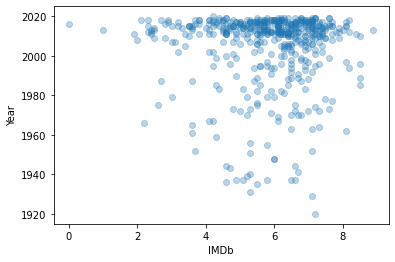

In [192]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['IMDb'], data_raw.iloc[random_subset]['Year'], alpha=0.3)
plt.ylabel('Year')
plt.xlabel('IMDb')
pass

Из диаграммы видно, что большее количество фильмов, которые вышли в прокат после 2000 года.

Построим диаграмму рассеивания для признаков 'Year' и 'Runtime'. На ней показана зависимость длительности фильма от года его выхода.

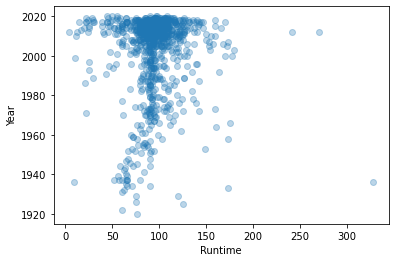

In [193]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Runtime'], data_raw.iloc[random_subset]['Year'], alpha=0.3)
plt.ylabel('Year')
plt.xlabel('Runtime')
pass

Из диаграммы видно, что длительность фильма не зависит от года выхода в прокат.

# 4. Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [194]:
data_raw.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

Необходимо заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [195]:
data_raw.fillna(data_raw.median(axis = 0), axis = 0, inplace=True)

In [196]:
data_raw.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                   0
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime                0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [197]:
data_raw['Age'].fillna(data_raw['Age'].mode().iloc[0], inplace=True)
data_raw['Directors'].fillna(data_raw['Directors'].mode().iloc[0], inplace=True)
data_raw['Country'].fillna(data_raw['Country'].mode().iloc[0], inplace=True)
data_raw['Language'].fillna(data_raw['Language'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Genres'].fillna(data_raw['Genres'].mode().iloc[0], inplace=True)
data_raw['Rotten Tomatoes'].fillna(data_raw['Rotten Tomatoes'].mode().iloc[0], inplace=True)

In [198]:
data_raw.isna().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

Изобразим основные характеристики для данных без пропущенных значений

In [199]:
data_raw.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16744.000000
mean,8371.500000,8372.500000,2003.014035,5.909478,0.212613,0.053930,0.737817,0.033684,0.0,93.363473
std,4833.720789,4833.720789,20.674321,1.325168,0.409169,0.225886,0.439835,0.180419,0.0,27.717073
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,83.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,103.250000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [200]:
data_raw.describe(include=['category'])

,Age,Rotten Tomatoes,Directors,Genres,Country,Language
count,16744,16744,16744,16744,16744,16744
unique,5,99,11338,1909,1303,1102
top,18+,100%,Jay Chapman,Drama,United States,English
freq,12864,11993,762,1616,9211,11554


Построим попарные матрицы разброса

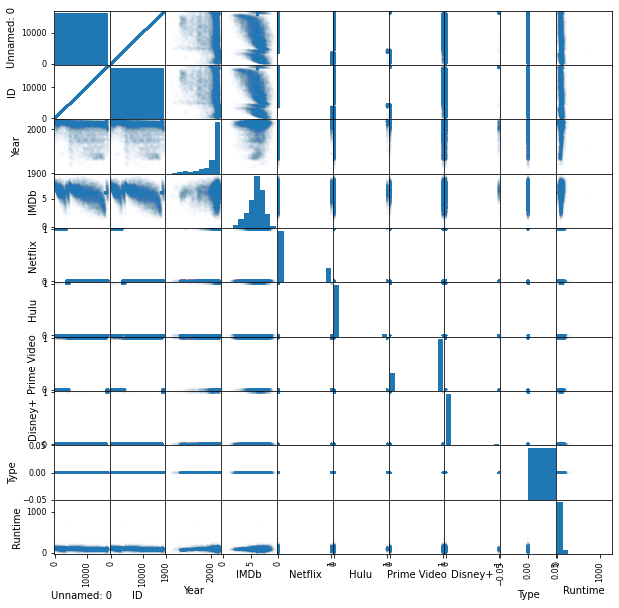

In [202]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Вычислим матрицу корреляции для количественных признаков.Используем визуальный образ этой матрицы. Чем ближе к красному цвет ячейки, тем больше по абсолютной величине коэффициент корреляции.

data_raw.corr()

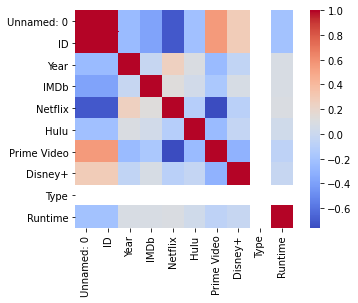

In [203]:

corr_mat=data_raw.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Наблюдается корреляция между уникальным ID фильма и поиском на платформе Prime Video, а также небольшая корреляция между годом выпуска фильма и поиском на платформе Netflix.


Выведем коэффициенты корреляции, большие заданного значения:


In [204]:
corr_mat > 0.5

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
Unnamed: 0,True,True,False,False,False,False,True,False,False,False
ID,True,True,False,False,False,False,True,False,False,False
Year,False,False,True,False,False,False,False,False,False,False
IMDb,False,False,False,True,False,False,False,False,False,False
Netflix,False,False,False,False,True,False,False,False,False,False
Hulu,False,False,False,False,False,True,False,False,False,False
Prime Video,True,True,False,False,False,False,True,False,False,False
Disney+,False,False,False,False,False,False,False,True,False,False
Type,False,False,False,False,False,False,False,False,False,False
Runtime,False,False,False,False,False,False,False,False,False,True


Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все.

Построим диаграммы рассеивания для признаков Age и Year,Runtime:

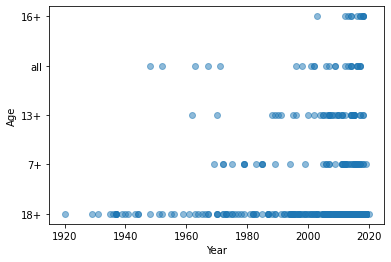

In [205]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Year'], data_raw.iloc[random_subset]['Age'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Age')
pass


Как видно из диаграммы,больше всего фильмов с возрастной категорией 18+:


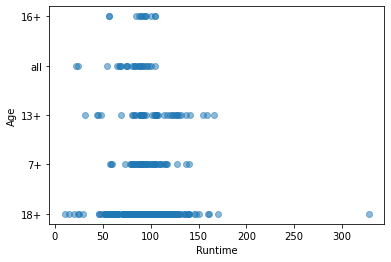

In [206]:

np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Runtime'], data_raw.iloc[random_subset]['Age'], alpha=0.5)
plt.xlabel('Runtime')
plt.ylabel('Age')
pass

Из диаграммы видно, что в среднем, большее число фильмов длятся 100 минут.

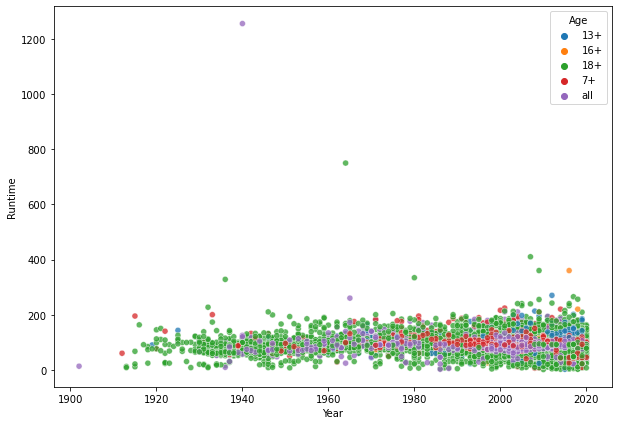

In [207]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x='Year', y='Runtime', hue='Age', data=data_raw, alpha=0.75)
pass

Из диаграммы видно, что для каждого года выхода фильма самое популярное возрастное ограничение - 18+. Всех меньше фильмов с возрастным ограничением 13+

# 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

1. приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;

2. стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:


In [208]:
x0 = data_raw.drop('Age', axis = 1)
y = data_raw['Age']
print("x:", x0.shape)
print("y:", y.shape)

x: (16744, 16)
y: (16744,)


In [209]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       16744 non-null  int64   
 1   ID               16744 non-null  int64   
 2   Title            16744 non-null  object  
 3   Year             16744 non-null  int64   
 4   Age              16744 non-null  category
 5   IMDb             16744 non-null  float64 
 6   Rotten Tomatoes  16744 non-null  category
 7   Netflix          16744 non-null  int64   
 8   Hulu             16744 non-null  int64   
 9   Prime Video      16744 non-null  int64   
 10  Disney+          16744 non-null  int64   
 11  Type             16744 non-null  int64   
 12  Directors        16744 non-null  category
 13  Genres           16744 non-null  category
 14  Country          16744 non-null  category
 15  Language         16744 non-null  category
 16  Runtime          16744 non-null  float64

In [210]:
x1 = x0.drop('Title', axis = 1)

In [211]:
x2 = x1.drop('Rotten Tomatoes', axis = 1)

In [212]:
x3 = x2.drop('Directors', axis = 1)

In [213]:
x4 = x3.drop('Genres', axis = 1)

In [214]:
x5 = x4.drop('Country', axis = 1)

In [215]:
x6 = x5.drop('Language', axis = 1)

In [216]:
x7 = x6.drop('ID', axis = 1)

In [217]:
x8 = x7.drop('Unnamed: 0', axis = 1)

In [218]:
x = x8.drop('Type', axis = 1)

Убрали столбцы с категориальными значениями,так как они не влияют на выборку,их не будем учитывать.

In [219]:
x

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
0,2010,8.8,1,0,0,0,148.0
1,1999,8.7,1,0,0,0,136.0
2,2018,8.5,1,0,0,0,149.0
3,1985,8.5,1,0,0,0,116.0
4,1966,8.8,1,0,1,0,161.0
...,...,...,...,...,...,...,...
16739,1980,6.2,0,0,0,1,120.0
16740,2001,4.7,0,0,0,1,90.0
16741,2013,5.7,0,0,0,1,92.0
16742,2017,6.6,0,0,0,1,92.0


In [220]:
x = (x - x.mean(axis = 0))/x.std(axis = 0)

In [221]:
x.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
count,1.674400e+04,1.674400e+04,1.674400e+04,1.674400e+04,1.674400e+04,1.674400e+04,1.674400e+04
mean,1.177704e-14,-9.964359e-14,-9.536101e-14,-2.040559e-14,1.118737e-15,9.011213e-15,-1.301820e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.885966e+00,-4.459418e+00,-5.196231e-01,-2.387479e-01,-1.677485e+00,-1.866970e-01,-3.332367e+00
25%,-1.457864e-01,-6.108493e-01,-5.196231e-01,-2.387479e-01,-1.677485e+00,-1.866970e-01,-3.739022e-01
50%,4.346438e-01,1.437719e-01,-5.196231e-01,-2.387479e-01,5.960950e-01,-1.866970e-01,-4.919255e-02
75%,6.281205e-01,7.474690e-01,-5.196231e-01,-2.387479e-01,5.960950e-01,-1.866970e-01,3.566945e-01
max,8.215972e-01,2.558560e+00,1.924357e+00,4.188268e+00,5.960950e-01,5.355953e+00,4.194658e+01


In [222]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 5)

N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

print(N_train, N_test)

11720 5024


In [223]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(x_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(x_train, y_train),'test accuracy =', rfc.score(x_test, y_test))
    i+=1

trees = 10 train accuracy = 0.9634812286689419 test accuracy = 0.7294984076433121
trees = 20 train accuracy = 0.9755119453924914 test accuracy = 0.7344745222929936
trees = 40 train accuracy = 0.981655290102389 test accuracy = 0.7418391719745223
trees = 80 train accuracy = 0.9833617747440273 test accuracy = 0.7432324840764332
trees = 160 train accuracy = 0.9834470989761093 test accuracy = 0.7456210191082803


Метод RandomForest показывает самую высокую точность на обучаещей выборке для 160 деревьев - 98%.На тестовой самая высокая точность достигается при 160 деревьев - 74%.

In [225]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,10,20,30,40,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(x_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(x_train, y_train),'test accuracy =', knn.score(x_test, y_test))
    i+=1

neighbours = 1 train accuracy = 0.9833617747440273 test accuracy = 0.6431130573248408
neighbours = 10 train accuracy = 0.7924914675767918 test accuracy = 0.771297770700637
neighbours = 20 train accuracy = 0.7895904436860068 test accuracy = 0.7754777070063694
neighbours = 30 train accuracy = 0.787542662116041 test accuracy = 0.7740843949044586
neighbours = 40 train accuracy = 0.7868600682593857 test accuracy = 0.7744824840764332
neighbours = 50 train accuracy = 0.7861774744027303 test accuracy = 0.7738853503184714


kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа - 98%. При увеличении количества соседей, точность на обучающей выборке падает, а на тестовой самая высокая точность достигается при 20 соседях - 77%, далее остается практически неизменной с увеличением количества соседей.

# Выводы

Оба метода показали практически одинакомую точность

# ВТОРАЯ ЧАСТЬ

# Метод главных компонент (PCA)

Сократим размерность исходного рпостранства до 2

In [226]:
from sklearn.decomposition import PCA

sc = sklearn.preprocessing.StandardScaler()
x_standart = sc.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_standart)
x_pca = pd.DataFrame(x_pca, columns=['1 компонента','2 компонента'])

In [227]:
x.shape, x_pca.shape

((16744, 7), (16744, 2))

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11720, 2), (11720,), (5024, 2), (5024,))

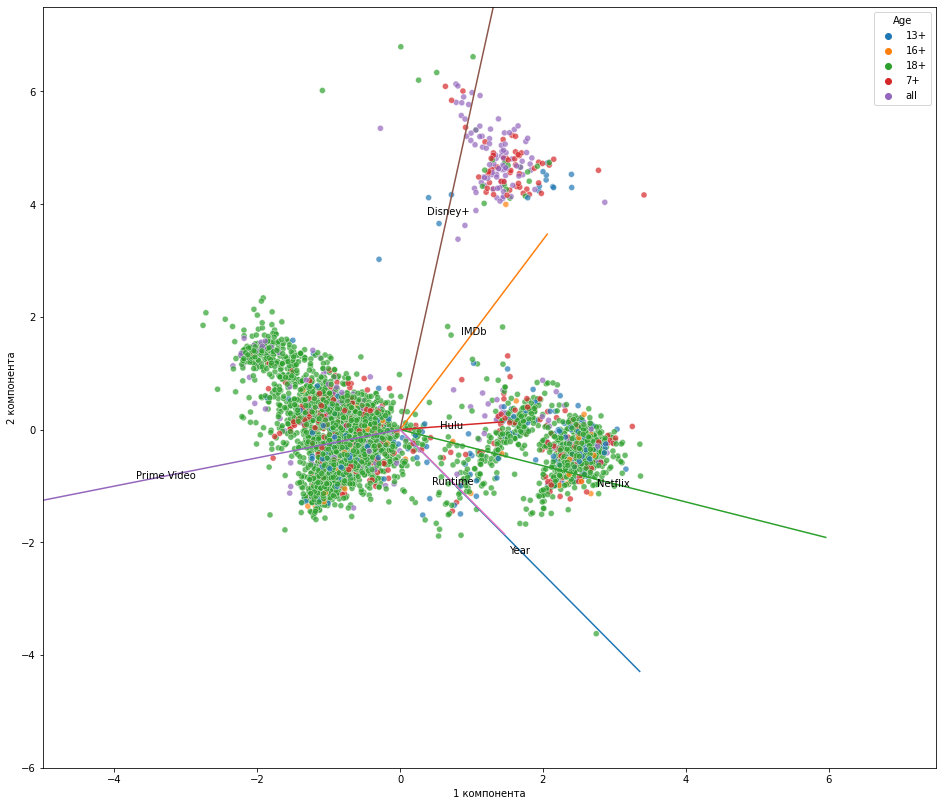

In [229]:

def biplot(xx, y, coeff, labels):
    plt.figure(figsize=(16,14))
    draw = pd.concat([xx, y], axis=1, join='inner')
    np.random.seed(10)
    random_subset = np.random.choice(np.arange(draw.shape[0]), size=5000, replace=False)
    sns.scatterplot(data=draw.iloc[random_subset], x='1 компонента', y='2 компонента', hue='Age', alpha=0.7)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*5, coeff[1, i]*5, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*10], [0, coeff[1, i]*10])
    plt.ylim((-6,7.5))
    plt.xlim((-5,7.5))
    
    
biplot(x_pca, y, pca.components_, x.columns)

Из графика можно заметить, что сильнее всего на выборку влияют:
    
    1. Наличие фильма на платформе Disney+.
    2. Наличие фильма на платформе Prime Video.
    3. Наличие фильма на платформе Netflix.

# Метод Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(x_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(x_train, y_train),'test accuracy =', rfc.score(x_test, y_test))

trees = 10 train accuracy = 0.9611774744027304 test accuracy = 0.7101910828025477
trees = 20 train accuracy = 0.9729522184300341 test accuracy = 0.723328025477707
trees = 40 train accuracy = 0.9808873720136518 test accuracy = 0.7235270700636943
trees = 80 train accuracy = 0.982679180887372 test accuracy = 0.7209394904458599
trees = 160 train accuracy = 0.9834470989761093 test accuracy = 0.7219347133757962


Точность на тренировочной и тестововй выборках отличаются. Добавим параметр max_depth и посмотрим как это повлияет на результаты

In [231]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i],max_depth=3)
    rfc.fit(x_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(x_train, y_train),'test accuracy =', rfc.score(x_test, y_test))

trees = 10 train accuracy = 0.7850682593856655 test accuracy = 0.7746815286624203
trees = 20 train accuracy = 0.7854948805460751 test accuracy = 0.7746815286624203
trees = 40 train accuracy = 0.7860068259385665 test accuracy = 0.7748805732484076
trees = 80 train accuracy = 0.7860921501706485 test accuracy = 0.7748805732484076
trees = 160 train accuracy = 0.7861774744027303 test accuracy = 0.7746815286624203


Точность на тестовой выборке повысилась с 72 до 77 процентов за счет изменения глубины дерева.

# Метод PCA с различным числом компонент

На графиках изобразим ошибку на тренировочной и тестовой выборке при использовании разного количества компонент

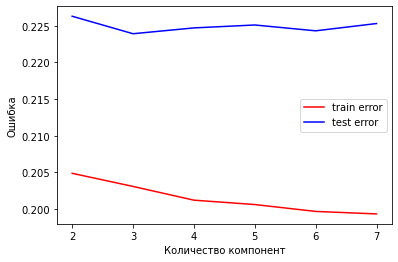

In [232]:
from sklearn.ensemble import RandomForestClassifier
test_error = []
train_error = []

pca_array = np.array([j+2 for j in range(6)])

for i in range(6):
    pca = PCA(n_components = pca_array[i])
    x_pca = pca.fit_transform(x_standart)
    x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=5)
    
    rfc = RandomForestClassifier(n_estimators = 200, max_depth=9)
    rfc.fit(x_train, y_train)
    
    test_error.append(1 - rfc.score(x_test, y_test))
    train_error.append(1 - rfc.score(x_train, y_train))

plt.plot(range(2,8), train_error, label="train error", color='red')
plt.plot(range(2,8), test_error, label="test error", color='blue')
plt.xlabel("Количество компонент")
plt.ylabel("Ошибка")
plt.legend()
pass

Ошибка на тренировочной выборке уменьшается, а на тестовой увеличивается. Происходит переобучение. Оптимальное количество компонент = 3

# Линейный дискриминантный анализ (LDA)

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sc = sklearn.preprocessing.StandardScaler()
x_standart = sc.fit_transform(x)

lda = LinearDiscriminantAnalysis(n_components = 2)
x_lda = lda.fit_transform(x_standart, y)
x_lda = pd.DataFrame(x_lda,columns = ['1 компонента','2 компонента'])

In [234]:
x.shape, x_lda.shape

((16744, 7), (16744, 2))

In [235]:
x_train,x_test, y_train, y_test = train_test_split(x_lda, y, test_size = 0.3, random_state = 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11720, 2), (11720,), (5024, 2), (5024,))

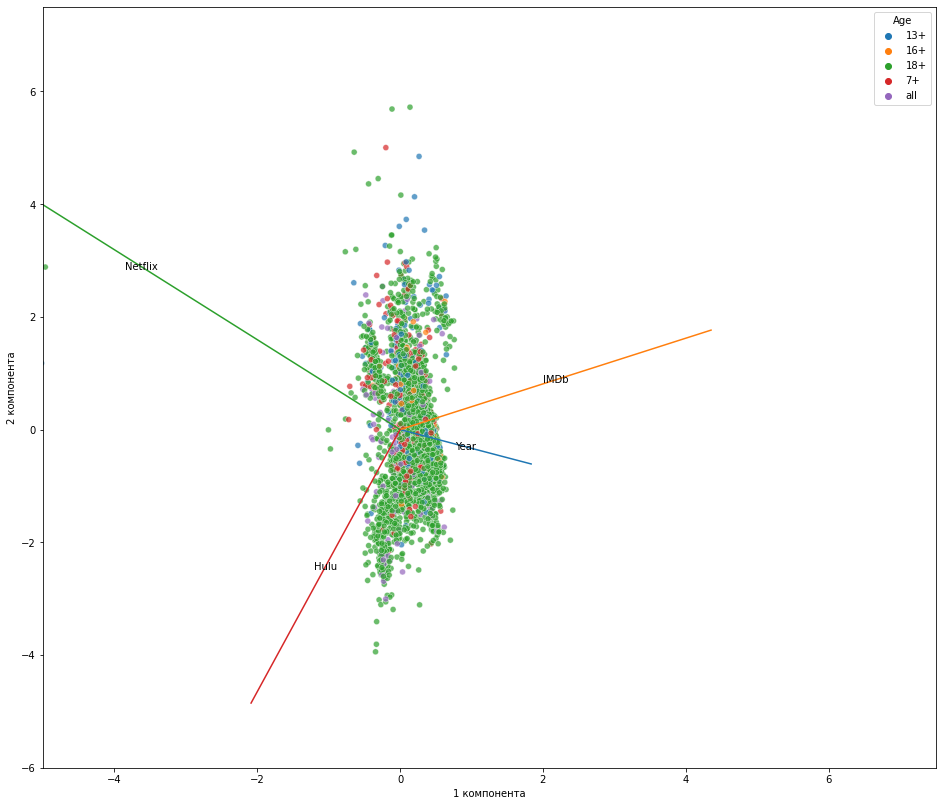

In [236]:
biplot(x_lda, y, lda.scalings_, x.columns)

Самыми важными признаками, при использовании LDA является Netflix.
    

# Метод Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i], max_depth=3)
    rfc.fit(x_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(x_train, y_train),'test accuracy =', rfc.score(x_test, y_test))

trees = 10 train accuracy = 0.7852389078498293 test accuracy = 0.7714968152866242
trees = 20 train accuracy = 0.7871160409556314 test accuracy = 0.7742834394904459
trees = 40 train accuracy = 0.7867747440273037 test accuracy = 0.7742834394904459
trees = 80 train accuracy = 0.7872013651877133 test accuracy = 0.7742834394904459
trees = 160 train accuracy = 0.7867747440273037 test accuracy = 0.7740843949044586


Ошибка на тестовой выборке практически не изменилась

# ВЫВОДЫ

Точность метода после применения PCA и LDA не изменилась, а значит, что оба метода хорошо подходят для данной задачи.